In [1]:
#Importing the necessary dependencies

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
import numpy as np
from scipy.optimize import minimize
import math
import scipy
from matplotlib import pyplot as plt

**The Variational Quantum Thermalizer**

The goal of this project is to implement the paper proposed by Guillaume Verdon, on the newly-created VQT algorithm, a generalization of VQE for thermal states. This is v1.0 of what will hopefully eventually be a nice tutorial!

In [13]:
#Creating the U-hat gate, which is trained over parameter phi

trotter = 2

def ryy_gate(qubit1, qubit2, theta):
    
    #Creates the RYY gate using the RXX gate and single-qubit rotations
    
    circ.s(qubit1)
    circ.s(qubit2)
    circ.rxx(theta, qubit1, qubit2)
    circ.sdg(qubit1)
    circ.sdg(qubit2)
        

def rotation(trotterization_depth, phi_params, qubit1, qubit2):
    
    #Creates the rotational ansatz outlined in the paper (modified slightly for the 1D Heisenberg model)
    
    for i in range(0, trotterization_depth):
        
        circ.rzz(phi_params[0], qubit1, qubit2)
        circ.rxx(phi_params[1], qubit1, qubit2)
        ryy_gate(qubit1, qubit2, phi_params[2])

        circ.rz(phi_params[3], qubit1)
        circ.rx(phi_params[4], qubit1)
        circ.ry(phi_params[5], qubit1)

        circ.rz(phi_params[6], qubit2)
        circ.rx(phi_params[7], qubit2)
        circ.ry(phi_params[8], qubit2)

def u_gate(phi_set, depth, model, qubits):
    
    #Applies repeated steps of the algorithm
    
    for i in range(0, depth):
        rotation(trotter, phi_set, 0, 1)
    

This is how the density matrix is decomposed (I think!):

$$\hat{\rho}_{\theta} \ = \ \frac{1}{Z_{\theta}} e^{-K_{\theta}} \ = \ \frac{1}{Z_{\theta}} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-K_{\theta})^n}{n!} \ = \ = \ \frac{1}{Z_{\theta}} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-\sum_{k} \theta_k |k\rangle \langle k|)^n}{n!} \ = \ \frac{1}{Z_{\theta}} \displaystyle\sum_{n \ = \ 0}^{\infty} \displaystyle\sum_{k} \ \frac{(-\theta_k)^n}{n!} |k\rangle \langle k| \ = \ \frac{1}{Z_{\theta}} \displaystyle\sum_{k} e^{-\theta_k} |k\rangle \langle k |$$

-0.5610525366055084
-0.5610525366055084
-0.5610525387384386
-0.5610525365974566
-0.5610525344841593
-0.561052536601979
-0.5610525336353656
-0.5610525412552736
-0.5610525342195689
-0.561052533951016
-0.5610525410359095
-0.5610525334625969
-0.5610525342865917
-0.5610525353614906
-0.5610525360116689
-0.7443504731886414
-0.7443504731886414
-0.7443504752311624
-0.7443504731798882
-0.7443504711586888
-0.7443504731848268
-0.7443504715499278
-0.7443504714133615
-0.7443504746048398
-0.7443504746003189
-0.7443504716039966
-0.7443504718821623
-0.7443504735352329
-0.7443504754971391
-0.7443504734028985
-0.8399880344024808
-0.8399880344024808
-0.8399880363607761
-0.8399880343928233
-0.8399880324580465
-0.8399880343982771
-0.8399880329216765
-0.8399880327583217
-0.8399880353706839
-0.8399880351921383
-0.8399880336960841
-0.8399880334953829
-0.8399880345545858
-0.8399880356149347
-0.8399880345047722
-0.835080152072331
-0.9666237833054364
-0.9666237833054364
-0.966623783687564
-0.9666237832931012
-0.9

-1.4065414830375882
-1.4065414830375882
-1.4065414830697818
-1.4065414830383334
-1.406541483081239
-1.4065414829609995
-1.4065414830460476
-1.4065414827713432
-1.4065414829823526
-1.4065414829967642
-1.406541483253804
-1.4065414830637357
-1.4065414829199496
-1.4065414828438092
-1.4065414830499143
-1.407239954747535
-1.407239954747535
-1.4072399547119403
-1.4072399547914336
-1.4072399548091985
-1.4072399546775665
-1.4072399547664813
-1.4072399545051488
-1.4072399546884353
-1.4072399547146157
-1.4072399549392973
-1.4072399547759993
-1.4072399546419814
-1.4072399545733194
-1.4072399547685277
-1.4105046371139396
-1.4105046371139396
-1.4105046368566787
-1.4105046373089143
-1.4105046372545422
-1.4105046370356225
-1.4105046371935954
-1.4105046369410508
-1.4105046370066099
-1.4105046370987568
-1.4105046372035346
-1.4105046371574883
-1.4105046370582761
-1.4105046370067913
-1.4105046371952337
-1.416882796078606
-1.416882796078606
-1.4168827957845884
-1.4168827963223731
-1.4168827962834811
-1.416

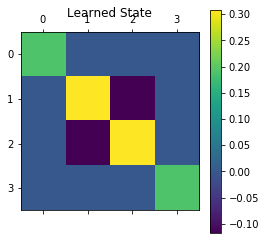

In [36]:
#Set beta, where B = 1/T

beta = 0.2

#Creates the initialization unitary for each of the computational basis states

def create_v_gate(prep_state):
    
    for i in range(0, len(prep_state)):
        if (prep_state[i] == 1):
            circ.x(i)
qubits = 2
depth = 1

#Runs the entire quantum circuit

def run_circuit(theta_param, phi_param):
    
    #Defines the partition function
    partition_function = 0
    for h in range(0, len(theta_param)):
        partition_function = partition_function+math.exp(-1*theta_param[h])
        
    
    #Defines the array of different probabilities
    prob_dist = []
    for i in range(0, len(theta_param)):
        prob_dist.append(math.exp(-1*theta_param[i]))
    
    #Runs through the circuit for each of the different computational basis states
    all_final_states = []
    all_states = [[0, 0], [0, 1], [1, 0], [1, 1]]
    for l in all_states:
        global circ
        circ = QuantumCircuit(qubits, qubits)
        create_v_gate(l)
        u_gate(phi_param, depth, 0, qubits)
        
        #Performs measurements on the qubits and gets the statevector
        backend = Aer.get_backend('statevector_simulator')
        job = execute(circ, backend)
        result = job.result()
        outputstate = result.get_statevector(circ)
        all_final_states.append(outputstate)
    
    #Returns the final statevectors, the parametrized probability distribution, and the partition function
    return [all_final_states, prob_dist, partition_function]

#Prepares the density matrix after running the circuit for each computational basis vector

def prepare_density_matrix(theta_param, phi_param):
    
    r = run_circuit(theta_param, phi_param)
    states = r[0]
    prob = r[1]
    part = r[2]
    
    #Calculates the outer product of each state
    final_density_matrix = np.zeros((2**qubits, 2**qubits))
    for h in range(0, len(states)):
        new_matrix = np.outer(np.array(states[h]), np.conj(np.array(states[h])))
        final_density_matrix = np.add(final_density_matrix,((1/part)*prob[h]*new_matrix))
    
    #Calculates the Von Neumann Entropy
    entropy = 0
    for i in range(0, len(prob)):
        entropy = entropy+(-1*prob[i]*(1/part)*math.log(prob[i]*(1/part)))
    
    #Returns the density matrix and the Von Neumann entropy
    return [final_density_matrix, entropy]

y_arr = [math.inf]
x_arr = [-1]

#Calculates the cost function for some density matrix
def calculate_cost_function(holder):
    
    theta_param = []
    for i in range(0, 4):
        theta_param.append(holder[i])
    phi_param = []
    for i in range(4, 13):
        phi_param.append(holder[i])
    
    a = prepare_density_matrix(theta_param, phi_param)
    dm = a[0]
    other = a[1]
    
    #Prepares the Hamiltonian in matrix form
    h = np.array([[1, 0, 0, 0], [0, -1, 2, 0], [0, 2, -1, 0], [0, 0, 0, 1]])
    
    #Calculates the value of the cost function
    cost = beta*np.trace(np.matmul(h, dm)) - other
    
    print(cost.real)
    
    #Data is outputted and used for graphs
    if (cost.real < min(y_arr)):
        y_arr.append(cost.real)
        x_arr.append(x_arr[len(x_arr)-1]+1)
        
    return cost.real
    

#Creates lits of random numbers as the initial parameters fed into the circuit
init1 = [random.randint(0, 600)/50 for i in range(0, 2**qubits)]
init2 = [random.randint(0, 600)/50 for i in range(0, 9)]
init = init1+init2

#Uses the SLSQP algorithm to minimize the cost function
out = minimize(calculate_cost_function, x0=init, method="SLSQP", options={'maxiter':50})
g = out['x']

#Prepares the density matrix for the optimal parameters
c = prepare_density_matrix(g[0:4], g[4:13])[0]
print(c)

#Creates the grid visualization of the density matrices

def create_density_plot(data, re):
    
    array = np.array(data)
    plt.matshow(array)
    plt.colorbar()
    if (re == 1):
        plt.title("Learned State")
    if (re == 2):
        plt.title("Target State")
    plt.show()

create_density_plot(c.real, 1)


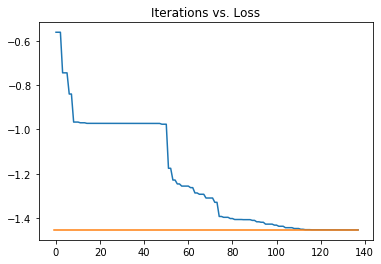

In [37]:
#Creates the graph that shows the minimization of the cost function over time
plt.plot(x_arr, y_arr)
plt.plot(x_arr, [-1.4535583194765307 for i in range(0, len(x_arr))])
plt.title("Iterations vs. Loss")
plt.show()

[[ 0.81873075  0.          0.          0.        ]
 [ 0.          1.32042478 -0.50169402  0.        ]
 [ 0.         -0.50169402  1.32042478  0.        ]
 [ 0.          0.          0.          0.81873075]]
[[ 0.19136775  0.          0.          0.        ]
 [ 0.          0.30863225 -0.1172645   0.        ]
 [ 0.         -0.1172645   0.30863225  0.        ]
 [ 0.          0.          0.          0.19136775]]


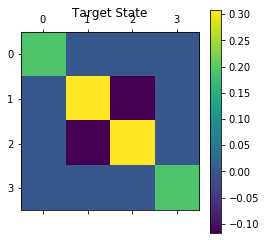

-1.4535583194765307


In [34]:
#Creates the target density matrix of the target thermal state, according to the 1D Heisenberg model Hamiltonian

h = np.array([[1, 0, 0, 0], [0, -1, 2, 0], [0, 2, -1, 0], [0, 0, 0, 1]])
ya = -1*float(beta)*h
new_matrix = scipy.linalg.expm(np.array(ya))
print(new_matrix)
norm = np.trace(new_matrix)
final_target = (1/norm)*new_matrix

print(final_target)

create_density_plot(final_target, 2)
plt.show()

entropy = -1*np.trace(np.matmul(final_target, scipy.linalg.logm(final_target)))

print(beta*np.trace(np.matmul(final_target, h)) - entropy)